<a href="https://colab.research.google.com/github/aser-tesfaye/Image_Classification_with_CNN/blob/main/Image_classification_with_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 6s 0us/step


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

#### # Display the labels of the first five images in the training set

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,) # Flatten the labels array to a 1D array
y_train[:5] # Display the first five labels

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,) # Flatten the labels array to a 1D array

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"] # Define the class labels

In [10]:
def plot_sample(X, y, index): # Define a function to plot a sample image and its label
    plt.figure(figsize = (15,2))  # Set the figure size to (15,2) inches
    plt.imshow(X[index])  # Display the image at the specified index
    plt.xlabel(classes[y[index]])  # Set the x-label to the corresponding class label

The function `plot_sample` takes three arguments:

`X`: This is your image data.

`y`: This contains the labels for your images.

`index`: This is the index of the specific image you want to plot.

In [11]:
import random

33973


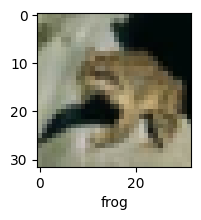

In [12]:
index = random.randint(0,49999)
plot_sample(X_train, y_train, index)
print(index)

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [16]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [21]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=64, kernel_size=(4, 4), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [22]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
cnn.fit(X_train, y_train, epochs=10)
#An epoch means training the neural network with all the training data for one cycle

Epoch 1/10
1563/1563 [==============================] - 12s 6ms/step - loss: 1.4431 - accuracy: 0.4817
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0725 - accuracy: 0.6247
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9285 - accuracy: 0.6783
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8298 - accuracy: 0.7108
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7507 - accuracy: 0.7386
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6777 - accuracy: 0.7645
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6158 - accuracy: 0.7858
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5605 - accuracy: 0.8027
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5083 - accuracy: 0.8211
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.45

In [24]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.9922 - accuracy: 0.7026


[0.9922150373458862, 0.7026000022888184]

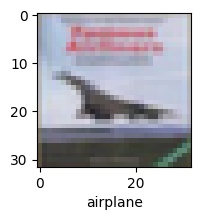

In [26]:
plot_sample(X_test, y_test,3)

In [27]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[6.5859880e-05, 1.8048981e-03, 1.0328485e-03, 9.4285518e-01,
        1.6605150e-04, 2.5747851e-02, 2.5856545e-02, 8.0356083e-05,
        2.2084631e-03, 1.8195962e-04],
       [2.1929634e-03, 7.4951656e-02, 4.4431503e-09, 5.5522616e-08,
        1.7641034e-12, 4.4745294e-10, 2.3107640e-12, 2.9519265e-10,
        9.2284250e-01, 1.2739932e-05],
       [1.3151278e-01, 1.0041062e-01, 8.3809602e-04, 5.6889923e-03,
        1.1432915e-03, 1.1272329e-04, 5.1686773e-04, 1.5488173e-03,
        7.4953115e-01, 8.6965868e-03],
       [9.5919335e-01, 4.6727332e-04, 2.5177926e-02, 1.0375725e-03,
        8.0434950e-03, 7.5305536e-05, 1.7406957e-05, 6.7142973e-04,
        5.3006224e-03, 1.5661653e-05],
       [1.8677605e-07, 2.7778708e-06, 8.4540294e-03, 4.5050509e-02,
        4.1137579e-01, 1.1269986e-03, 5.3397113e-01, 1.4099639e-06,
        1.7078983e-05, 8.6522611e-08]], dtype=float32)

In [28]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:15]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9]

In [29]:
y_test[:15]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9], dtype=uint8)

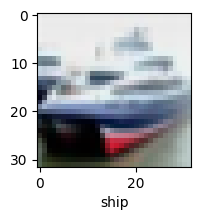

In [30]:
plot_sample(X_test, y_test,1)

In [32]:
classes[y_classes[3]]

'airplane'

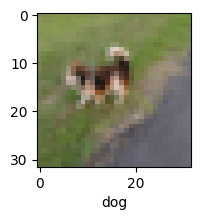

In [39]:
index = random.randint(0,9999)
classes[y_classes[index]]
plot_sample(X_test, y_test,index)